4.1学习就是参数估计

In [85]:
import torch
import numpy
%matplotlib inline
from matplotlib import pyplot as plt

In [86]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_c:真实摄氏度（真实数据集）
t_u:未知单位（待训练数据集）

使用线性模型(y=w*x+b)

In [87]:
# 定义模型
def model(t_u,w,b):
    return w*t_u+b

In [88]:
# 定义损失函数
def loss_fn(t_p,t_c):
    squared_diffs=(t_p-t_c)**2
    return squared_diffs.mean()

t_p:回归出的值
损失函数定义的是平方损失，使用最小二乘法

初始化参数，调用模型

In [89]:
w=torch.ones(1)
b=torch.zeros(1)
t_p=model(t_u,w,b)
w,b,t_p

(tensor([1.]),
 tensor([0.]),
 tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]))

In [90]:
loss=loss_fn(t_p,t_c)
loss

tensor(1763.8848)

目前的loss表示在初始化w，b=1的情况下，预测值和真实值之间的误差。接下来要做的是如何更改w和b，让loss达到最小值。
使用梯度下降算法

In [91]:
delta = 0.1
loss_rate_of_change_w = (loss_fn(model(t_u, w + delta, b), t_c) -
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)
learning_rate = 1e-2
w = w - learning_rate * loss_rate_of_change_w
loss_rate_of_change_w,w

(tensor(4517.2974), tensor([-44.1730]))

In [92]:
loss_rate_of_change_b = (loss_fn(model(t_u, w, b + delta), t_c) -
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)
b = b - learning_rate * loss_rate_of_change_b
loss_rate_of_change_b,b

(tensor(-4600.), tensor([46.]))

类似于函数在邻域中的变化情况，f(x+h)-f(x-h)/2h,当limh->0时，相当于对函数f(x)求导
领域delta不清楚应该有多大，学习率learing_rate也不知道具体该为多少

接下来该求梯度了，即求导

In [93]:
# 定义损失函数的导数
def dloss_fn(t_p,t_c):
    dsq_diffs=2*(t_p-t_c)
    return dsq_diffs

In [94]:
# 定义模型的导数
def dmodel_dw(t_u,w,b):
    return t_u
def dmodel_db(t_u,w,b):
    return 1.0

In [95]:
# loss相对于w和b的梯度的函数
def grad_fn(t_u,t_c,t_p,w,b):
    dloss_dw=dloss_fn(t_p,t_c)*dmodel_dw(t_u,w,b)
    dloss_db=dloss_fn(t_p,t_c)*dmodel_db(t_u,w,b)
    return torch.stack([dloss_dw.mean(),dloss_db.mean()])

用数学符号表示的上述过程如图所示
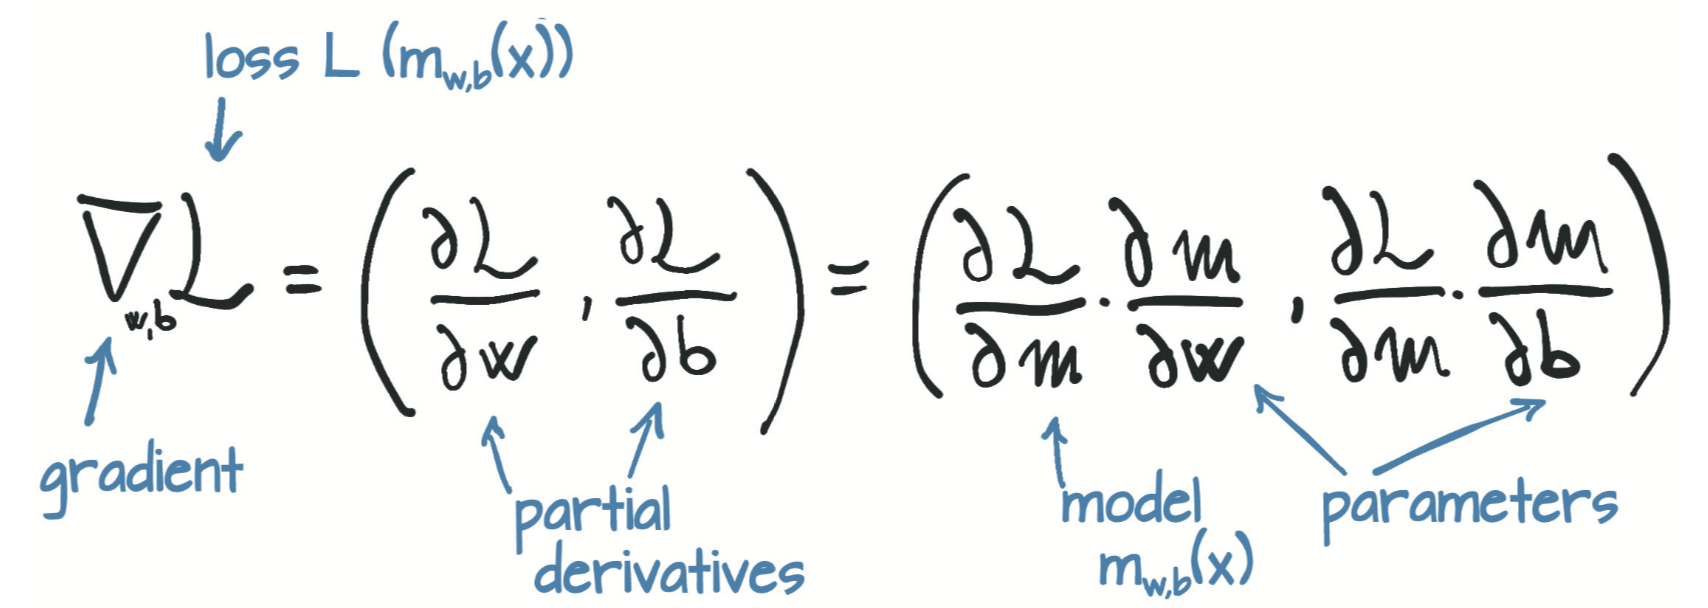

在定义好求梯度的函数之后，就可以进行训练。每次训练成为一个epoch。训练直到参数停止更新，即收敛的时候，训练停止。

In [96]:
# 定义训练循环
def training_loop(n_epochs,learning_rate,params,t_u,t_c,print_params=True,verbose=1):
    for epoch in range(1,n_epochs+1):
        w,b=params
        t_p=model(t_u,w,b)
        loss=loss_fn(t_p,t_c)
        grad=grad_fn(t_u,t_c,t_p,w,b)
        params=params-learning_rate*grad
        if(epoch%verbose==0):
            print('Epoch %d,Loss %f'%(epoch,float(loss)))
            if(print_params):
                print('\tParams: ',params)
                print('\tGrad: ',grad)
    return params

In [97]:
# 调用训练循环
training_loop(n_epochs=10,learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u=t_u,t_c=t_c)

Epoch 1,Loss 1763.884766
	Params:  tensor([-44.1730,  -0.8260])
	Grad:  tensor([4517.2964,   82.6000])
Epoch 2,Loss 5802484.500000
	Params:  tensor([2568.4011,   45.1637])
	Grad:  tensor([-261257.4062,   -4598.9707])
Epoch 3,Loss 19408029696.000000
	Params:  tensor([-148527.7188,   -2616.3931])
	Grad:  tensor([15109613.0000,   266155.6875])
Epoch 4,Loss 64915893125120.000000
	Params:  tensor([8589997.0000,  151310.8594])
	Grad:  tensor([-8.7385e+08, -1.5393e+07])
Epoch 5,Loss 217130405201969152.000000
	Params:  tensor([-4.9680e+08, -8.7510e+06])
	Grad:  tensor([5.0539e+10, 8.9023e+08])
Epoch 6,Loss 726257090571718885376.000000
	Params:  tensor([2.8732e+10, 5.0610e+08])
	Grad:  tensor([-2.9229e+12, -5.1486e+10])
Epoch 7,Loss 2429182551776534441492480.000000
	Params:  tensor([-1.6617e+12, -2.9270e+10])
	Grad:  tensor([1.6904e+14, 2.9776e+12])
Epoch 8,Loss 8125120778724300355933306880.000000
	Params:  tensor([9.6102e+13, 1.6928e+12])
	Grad:  tensor([-9.7764e+15, -1.7221e+14])
Epoch 9,Loss

tensor([3.2144e+17, 5.6621e+15])

当学习率比较高（这里为0.01）时，有可能参数不收敛，发散到无穷大。
所以一般设置学习率为0.0001

In [98]:
# 调用训练循环
training_loop(n_epochs=10,learning_rate=1e-4,params=torch.tensor([1.0,0.0]),t_u=t_u,t_c=t_c)

Epoch 1,Loss 1763.884766
	Params:  tensor([ 0.5483, -0.0083])
	Grad:  tensor([4517.2964,   82.6000])
Epoch 2,Loss 323.090515
	Params:  tensor([ 0.3623, -0.0118])
	Grad:  tensor([1859.5492,   35.7843])
Epoch 3,Loss 78.929634
	Params:  tensor([ 0.2858, -0.0135])
	Grad:  tensor([765.4666,  16.5122])
Epoch 4,Loss 37.552845
	Params:  tensor([ 0.2543, -0.0143])
	Grad:  tensor([315.0790,   8.5787])
Epoch 5,Loss 30.540283
	Params:  tensor([ 0.2413, -0.0149])
	Grad:  tensor([129.6733,   5.3127])
Epoch 6,Loss 29.351154
	Params:  tensor([ 0.2360, -0.0153])
	Grad:  tensor([53.3496,  3.9682])
Epoch 7,Loss 29.148884
	Params:  tensor([ 0.2338, -0.0156])
	Grad:  tensor([21.9304,  3.4148])
Epoch 8,Loss 29.113848
	Params:  tensor([ 0.2329, -0.0159])
	Grad:  tensor([8.9965, 3.1869])
Epoch 9,Loss 29.107145
	Params:  tensor([ 0.2325, -0.0162])
	Grad:  tensor([3.6721, 3.0930])
Epoch 10,Loss 29.105247
	Params:  tensor([ 0.2324, -0.0166])
	Grad:  tensor([1.4803, 3.0544])


tensor([ 0.2324, -0.0166])

由于梯度中w的梯度是b梯度的50倍，所以可以将t_u乘0.1

In [99]:
t_un=0.1*t_u # n为规范化输入
t_u,t_un

(tensor([35.7000, 55.9000, 58.2000, 81.9000, 56.3000, 48.9000, 33.9000, 21.8000,
         48.4000, 60.4000, 68.4000]),
 tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
         6.0400, 6.8400]))

然后再进行训练，这时候发现，当学习率为0.1时，参数也不会发散

In [100]:
# 调用训练循环
training_loop(n_epochs=10,learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u=t_un,t_c=t_c)

Epoch 1,Loss 80.364342
	Params:  tensor([1.7761, 0.1064])
	Grad:  tensor([-77.6140, -10.6400])
Epoch 2,Loss 37.574917
	Params:  tensor([2.0848, 0.1303])
	Grad:  tensor([-30.8623,  -2.3864])
Epoch 3,Loss 30.871077
	Params:  tensor([2.2094, 0.1217])
	Grad:  tensor([-12.4631,   0.8587])
Epoch 4,Loss 29.756193
	Params:  tensor([2.2616, 0.1004])
	Grad:  tensor([-5.2218,  2.1327])
Epoch 5,Loss 29.507153
	Params:  tensor([2.2853, 0.0740])
	Grad:  tensor([-2.3715,  2.6310])
Epoch 6,Loss 29.392456
	Params:  tensor([2.2978, 0.0458])
	Grad:  tensor([-1.2492,  2.8241])
Epoch 7,Loss 29.298828
	Params:  tensor([2.3059, 0.0168])
	Grad:  tensor([-0.8071,  2.8970])
Epoch 8,Loss 29.208717
	Params:  tensor([ 2.3122, -0.0124])
	Grad:  tensor([-0.6325,  2.9227])
Epoch 9,Loss 29.119415
	Params:  tensor([ 2.3178, -0.0417])
	Grad:  tensor([-0.5633,  2.9298])
Epoch 10,Loss 29.030489
	Params:  tensor([ 2.3232, -0.0710])
	Grad:  tensor([-0.5355,  2.9295])


tensor([ 2.3232, -0.0710])

In [101]:
# 增加训练轮次
params=training_loop(n_epochs=5000,learning_rate=1e-2,params=torch.tensor([1.0,0.0]),t_u=t_un,t_c=t_c,print_params=False,verbose=500)
#这里用了一个params来存储训练结果，就是保存了训练后的w和b。
params

Epoch 500,Loss 7.860117
Epoch 1000,Loss 3.828538
Epoch 1500,Loss 3.092191
Epoch 2000,Loss 2.957698
Epoch 2500,Loss 2.933134
Epoch 3000,Loss 2.928648
Epoch 3500,Loss 2.927831
Epoch 4000,Loss 2.927680
Epoch 4500,Loss 2.927651
Epoch 5000,Loss 2.927648


tensor([  5.3671, -17.3012])

最后一步，画图。只有画图才能直观的看到数据结果，才能进一步分析。

In [102]:
t_p = model(t_un, *params) # 记住你是在规范后数据上训练的

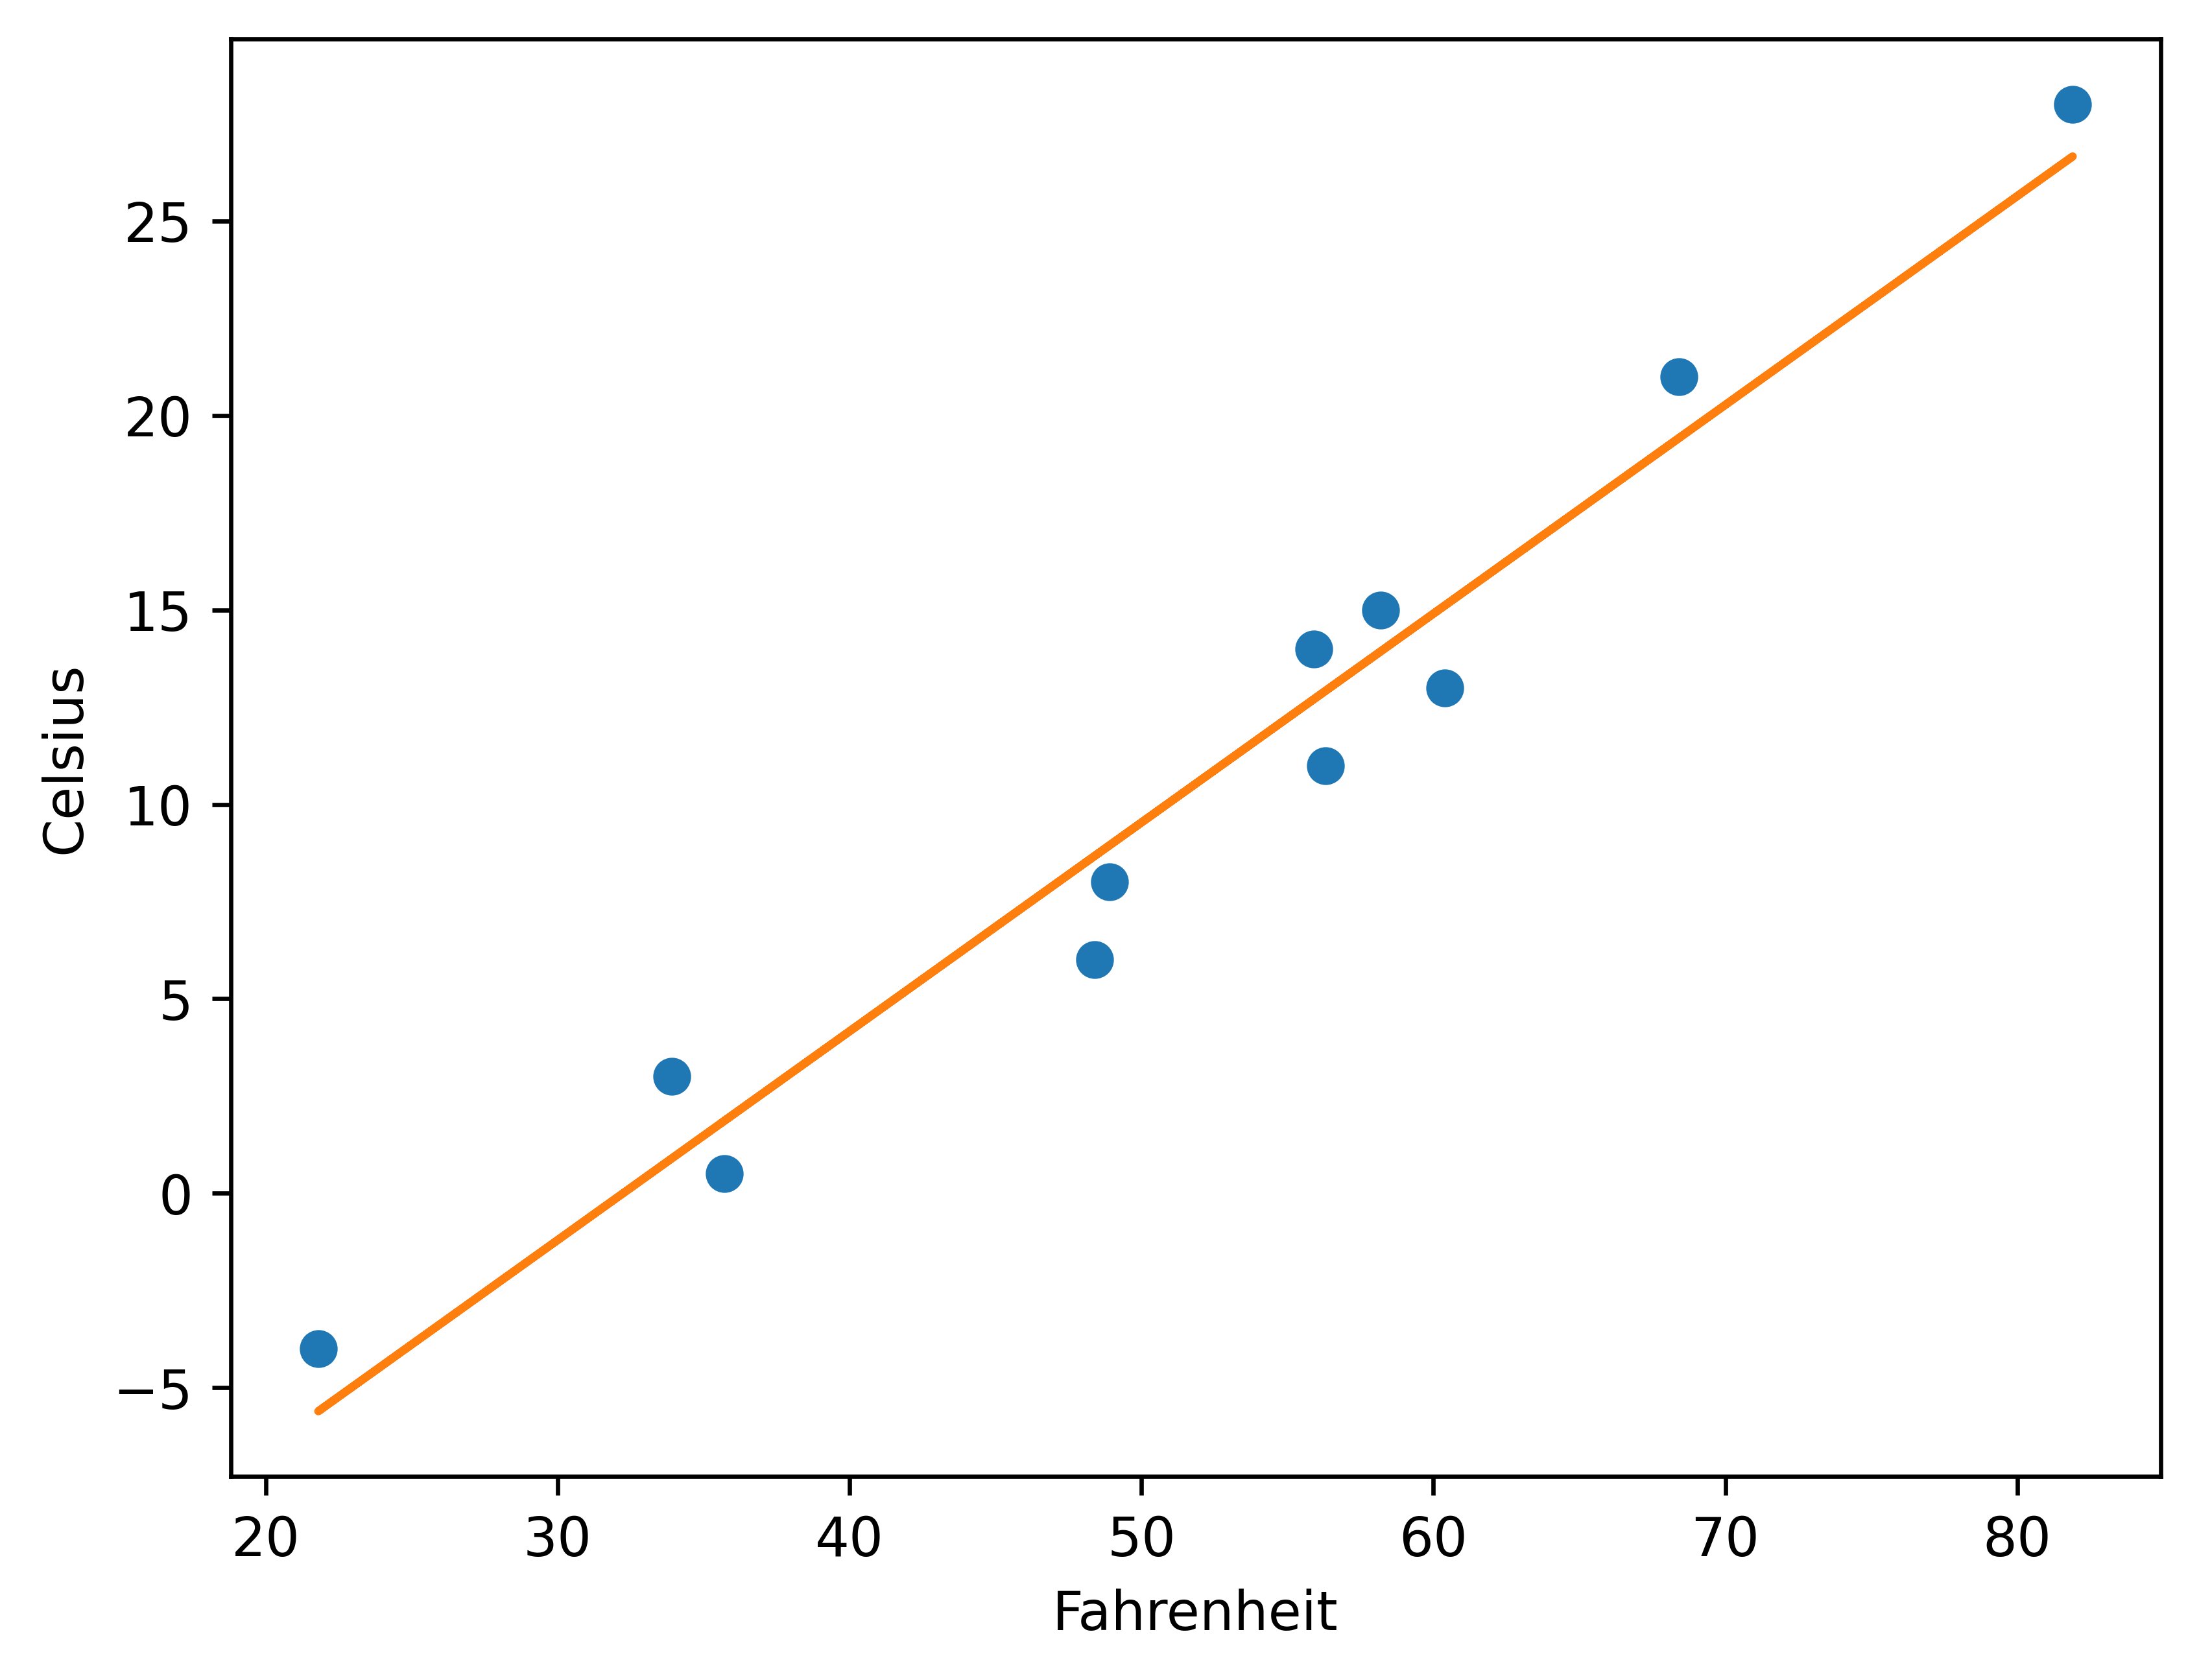

In [103]:

fig = plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")

plt.plot(t_u.numpy(), t_c.numpy(), 'o') # 蓝点，代表输入数据
plt.plot(t_u.numpy(), t_p.numpy()) # 黄线，代表回归之后的结果
